# CNN Assignment-I
Dataset: https://www.kaggle.com/apollo2506/eurosat-dataset
Read the description of dataset. 
Build a CNN model to predict the label for given image. 
Follow the instructions given in notebook.

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
os.listdir('/kaggle/input/eurosat-dataset/EuroSAT')

In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
print(os.listdir('/kaggle/input/eurosat-dataset/EuroSAT/'))
path1='/kaggle/input/eurosat-dataset/EuroSAT/'

# --------------------------Start Your Code Here -----------------------------
# Read the train dataframe 

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import image
from PIL import Image

traindf=pd.read_csv(path1+'train.csv')
traindf.shape

            

In [ ]:
traindf.columns

In [ ]:
traindf.drop('Unnamed: 0',axis=1,inplace=True)
traindf.head(10)

In [ ]:
traindf.columns

# Define a method load_data 
Accept 2 parameters list / series of image file names and tuple of image size.
The function should return a numpy array with all images of given list with specified size.
Normalize the data by dividing with 255

In [ ]:
#load_data(myval.Filename,(32,32))

def load_data(im_file_names, im_sizes):
    imgs=[]
    
    print(im_file_names)
    print(im_sizes)

    for fname in im_file_names :
        img=Image.open(path1+fname)
#        img=img.convert('RGB')
        img=img.resize(im_sizes)
        
#        imgs=np.array(img)/255
        imgs.append(np.array(img)/255)
    return np.array(imgs)




# Prepare the train dataset for CNN model.
Expected shape: (18900, 32, 32, 3)

In [ ]:
from sklearn.model_selection import train_test_split


im_file_names=traindf.Filename
im_files=load_data(traindf.Filename,(32,32))


In [ ]:
im_files.shape

In [ ]:
tgt=traindf.Label
im_files,tgt

In [ ]:
testdf=pd.read_csv(path1+'test.csv')
print(testdf.columns)
print(testdf.head(10))
testdf.drop('Unnamed: 0',axis=1,inplace=True)
print(testdf.head(10))

test_imfiles=load_data(testdf.Filename, (32,32))
test_tgt=testdf.Label


In [ ]:
test_imfiles.shape

# Build Le-Net-5 
Model summary:
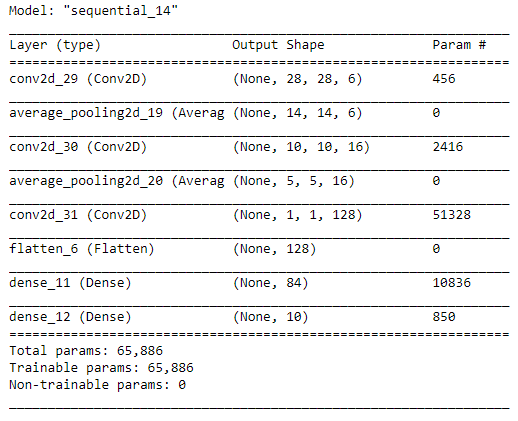
Optimizer: Adam;
Select the suitable Loss Function; 
Use metrics: Accuracy; 
Train model with 150 epochs


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, AveragePooling2D, Dropout, Flatten, Dense

#from tensorflow.keras.layers import BatchNormalization


model = Sequential()

model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='tanh', input_shape=(32,32,3)))
model.add(AveragePooling2D())

model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='tanh'))
model.add(AveragePooling2D())

model.add(Conv2D(filters=128, kernel_size=(5,5),activation='tanh'))

model.add(Flatten())

model.add(Dense(units=84, activation='tanh'))

model.add(Dense(units=10, activation = 'softmax'))

model.summary()

model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.fit(im_files, tgt, epochs=150)

# Evaluate with test dataset
Expected shape: (2700, 32, 32, 3)

In [ ]:
model.evaluate(test_imfiles,test_tgt)

# ---------------------------End Code--------------------------


# Predict labels for given images
Take the images form 300 to 307 in validation data and predict the labels. And also display the images and corresponding labels.

In [ ]:
val_data=pd.read_csv(path1+'validation.csv')
myval=val_data[300:308]
mylabels=val_data.Label[300:308]
myclasses=val_data.ClassName[300:308]
val_img_data=load_data(myval.Filename,(32,32))
pred=model.predict_classes(val_img_data)
original_labels=pd.read_json(path1+'label_map.json',orient='index')
labels=original_labels.index[pred]

In [ ]:
c=0
fig = plt.figure(figsize=(10,10))
for i in val_img_data:
    ax = fig.add_subplot(2, 4, c+1)
    imgplot = plt.imshow(i)
    ax.set_title(labels[c]+'/'+myclasses.loc[300+c])
    c=c+1
plt.show()
